In [1]:
import pandas as pd
import opendatasets as od
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras import backend as K
!pip3 install keras-tuner --upgrade

Requirement already up-to-date: keras-tuner in /home/apprenant/PycharmProjects/ClimateProject---E3/env/lib/python3.8/site-packages (1.1.2)


In [2]:
od.download("https://www.kaggle.com/saurabhbagchi/ship-and-iceberg-images")

Skipping, found downloaded files in "./ship-and-iceberg-images" (use force=True to force download)


In [3]:
import os
for dirname, _, filenames in os.walk('/home/apprenant/PycharmProjects/ClimateProject---E3/ship-and-iceberg-images/input_data.npz'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

 # Load the data

In [4]:
npz = np.load('/home/apprenant/PycharmProjects/ClimateProject---E3/Data analysis/ship-and-iceberg-images/input_data.npz')

x = npz['X_train']
y = npz['Y_train']
del npz

In [5]:
print('shape of picture: {}'.format(x.shape))
print('shape of picture: {}'.format(y.shape))

shape of picture: (4113, 75, 75, 3)
shape of picture: (4113,)


In [6]:
# First split the data in two sets, 80% for training, 20% for Val/Test)
X_train, X_valtest, y_train, y_valtest = train_test_split(x,y, test_size=0.2, random_state=1, stratify=y)

# Second split the 20% into validation and test sets
X_test, X_val, y_test, y_val = train_test_split(X_valtest, y_valtest, test_size=0.8, random_state=1, stratify=y_valtest)

In [7]:
print(np.array(X_train).shape)
print(np.array(X_val).shape)
print(np.array(X_test).shape)
print(np.array(y_train).shape)
print(np.array(y_val).shape)
print(np.array(y_test).shape)

(3290, 75, 75, 3)
(659, 75, 75, 3)
(164, 75, 75, 3)
(3290,)
(659,)
(164,)


In [8]:
ix = 100#0-4112
labels = ['Ship','Iceberg']  #0 is no iceberg(ship) and 1 is iceberg
print ('This is:',labels[int(y_train[ix])])

This is: Iceberg


In [9]:
K.image_data_format()

'channels_last'

In [10]:
img_width, img_height = 75, 75
nb_train_samples = len(X_train)
nb_validation_samples = len(X_val)
epochs = 10
batch_size = 16

In [11]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3)))
model.add(layers.Activation("relu"))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.Activation("relu"))
model.add(layers.Dropout(0.2))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3)))
model.add(layers.Activation("relu"))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64))
model.add(layers.BatchNormalization())
model.add(layers.Activation("relu"))

model.add(layers.Dense(1))
model.add(layers.BatchNormalization())
model.add(layers.Activation("sigmoid"))

model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7, decay=0.0),
    metrics=['accuracy']);


/home/apprenant/.local/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


DATA AUGMENTATION

In [12]:
#train_datagen = ImageDataGenerator(rescale=1. / 255, horizontal_flip=True, rotation_range=30)
#valtest_datagen = ImageDataGenerator(rescale=1. / 255)

In [13]:
#train_generator = train_datagen.flow(np.array(X_train), y_train, batch_size=batch_size)
#validation_generator = valtest_datagen.flow(np.array(X_val), y_val, batch_size=batch_size)
#test_generator = valtest_datagen.flow(np.array(X_test), y_test, batch_size=batch_size)

In [14]:
# Create early stopping (once our model stops improving, stop training)
early_stopping = EarlyStopping(monitor="val_accuracy", patience=6) # stops after 6 rounds of no improvements

In [15]:
history = model.fit(
    X_train, y_train, 
    batch_size,
    epochs=epochs,
    validation_data=(X_val, y_val),
    callbacks=early_stopping,
);

#model.save_weights('weights.h5')

Epoch 1/10
206/206 [==============================] - 40s 189ms/step - loss: 0.4592 - accuracy: 0.8191 - val_loss: 0.4713 - val_accuracy: 0.8179
Epoch 2/10
206/206 [==============================] - 38s 185ms/step - loss: 0.3906 - accuracy: 0.8702 - val_loss: 0.3833 - val_accuracy: 0.8574
Epoch 3/10
206/206 [==============================] - 38s 185ms/step - loss: 0.3276 - accuracy: 0.9122 - val_loss: 0.4759 - val_accuracy: 0.7405
Epoch 4/10
206/206 [==============================] - 38s 185ms/step - loss: 0.2632 - accuracy: 0.9502 - val_loss: 0.3372 - val_accuracy: 0.8710
Epoch 5/10
206/206 [==============================] - 38s 185ms/step - loss: 0.2134 - accuracy: 0.9796 - val_loss: 0.5295 - val_accuracy: 0.7026
Epoch 6/10
206/206 [==============================] - 43s 208ms/step - loss: 0.1876 - accuracy: 0.9802 - val_loss: 0.7404 - val_accuracy: 0.6404
Epoch 7/10
206/206 [==============================] - 40s 194ms/step - loss: 0.1628 - accuracy: 0.9848 - val_loss: 0.3306 - val_ac

# RUN CNN

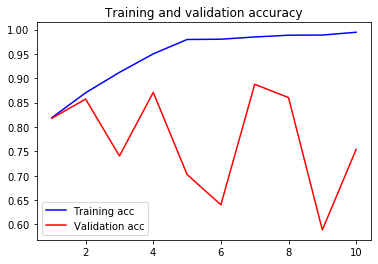

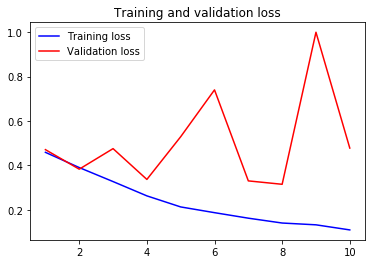

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'blue', label='Training acc')
plt.plot(epochs, val_acc, 'red', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'blue', label='Training loss')
plt.plot(epochs, val_loss, 'red', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# ÉVALUATION

In [17]:


#create a dataframe of the model training history
results = pd.DataFrame(history.history)
results.head()



,loss,accuracy,val_loss,val_accuracy
0,0.459181,0.819149,0.471294,0.817906
1,0.390632,0.870213,0.383349,0.857360
2,0.327587,0.912158,0.475850,0.740516
3,0.263216,0.950152,0.337238,0.871017
4,0.213409,0.979635,0.529515,0.702580


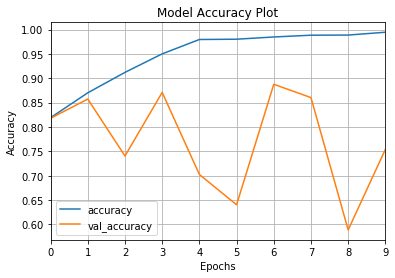

In [18]:
#plot the accuracy over the training and test set
results[["accuracy",'val_accuracy']].plot()
plt.title('Model Accuracy Plot')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

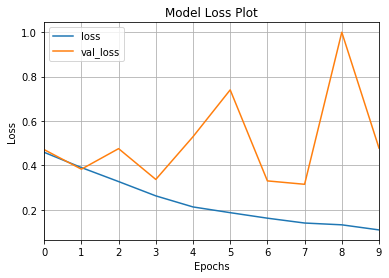

In [19]:
#plot the loss over the training and test set
results[['loss','val_loss']].plot()
plt.title('Model Loss Plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.show()

In [20]:
ix = 100#0-4112

In [21]:
model.predict(X_train)

array([[0.03825966],
       [0.02307621],
       [0.01478669],
       ...,
       [0.00872037],
       [0.79137903],
       [0.02476904]], dtype=float32)

In [22]:
import pickle
import tempfile
from tensorflow.keras.models import Sequential, load_model, save_model, Model
from tensorflow.keras.layers import Dense

# Hotfix function
def make_keras_picklable():
    def __getstate__(self):
        model_str = ""
        with tempfile.NamedTemporaryFile(suffix='.hdf5', delete=True) as fd:
            save_model(self, fd.name, overwrite=True)
            model_str = fd.read()
        d = {'model_str': model_str}
        return d

    def __setstate__(self, state):
        with tempfile.NamedTemporaryFile(suffix='.hdf5', delete=True) as fd:
            fd.write(state['model_str'])
            fd.flush()
            model = load_model(fd.name)
        self.__dict__ = model.__dict__


    cls = Model
    cls.__getstate__ = __getstate__
    cls.__setstate__ = __setstate__

# Run the function
make_keras_picklable()


In [23]:
# Saving the model for Future Inferences

model_json = model.to_json()
with open("/home/apprenant/PycharmProjects/ClimateProject---E3/model/cnn.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/home/apprenant/PycharmProjects/ClimateProject---E3/model/cnn.h5")

In [24]:
model.save('my_model')

INFO:tensorflow:Assets written to: my_model/assets


In [25]:
import tensorflow as tf
from tensorflow.keras.models import model_from_json, load_model
import tensorflow.keras.backend as K
import numpy as np
from imageio import imread, imsave
from PIL import Image
import re
import pandas
import sys
import os

In [26]:
# pour récupérer le modèle
model2 = tf.keras.models.load_model('my_model')

In [27]:
#test prediction

In [28]:

def predict(path):
    x = imread(path)
    x = np.resize(x,(1,75,75,3))
    model = model2
    out = model.predict(x)
    print(out)
    return out[0]

In [29]:
predict('/home/apprenant/Downloads/2.png')

[[1.]]


array([1.], dtype=float32)

In [30]:
print(out)

NameError: name 'out' is not defined